<a href="https://colab.research.google.com/github/Ali-ElGamal/DataAnalysisProjects/blob/main/Employee_Attrition_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Acquisition
In this section, we will scrape data from a GitHub page and write the extracted data to a CSV file.

In [ ]:
#DATA SCRAPING
import requests
from bs4 import BeautifulSoup
import csv
import time
import tracemalloc



# Initialize tracemalloc
tracemalloc.start()

# Start timer
start_time = time.time()






# URL of the GitHub page with the table
url = "https://github.com/pplonski/datasets-for-start/blob/master/employee_attrition/HR-Employee-Attrition-All.csv"

# Make an HTTP request and get the HTML content of the page
response = requests.get(url)
html_content = response.content

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

# Find the table element in the HTML
table = soup.find("table")

# Extract the data from the table
table_data = []
header = []
for i, row in enumerate(table.find_all("tr")):
    row_data = []
    for cell in row.find_all(["td", "th"]):
        if cell.text.strip():
            row_data.append(cell.text.strip())
    if i == 0:
        header = row_data
    else:
        table_data.append(row_data)

#print("Header:", header)
#print("Table data:", table_data)

# Write the table data to a CSV file
with open("table_data.csv", "w", newline="", encoding="utf-8") as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(header)
    writer.writerows(table_data)


# End timer
end_time = time.time()

# Calculate elapsed time
elapsed_time = end_time - start_time

# Print elapsed time
print("Elapsed time: %.2f seconds" % elapsed_time)

# Print memory usage
current, peak = tracemalloc.get_traced_memory()
print(f"Current memory usage: {current / 10**6}MB")
print(f"Peak memory usage: {peak / 10**6}MB")

# Stop tracing memory
tracemalloc.stop()


Elapsed time: 29.36 seconds
Current memory usage: 64.220803MB
Peak memory usage: 64.367752MB


Data Preprocessing
In this section, we will preprocess the scraped data by cleaning and transforming it to the desired format.

In [ ]:
import pandas as pd

# Read the CSV file into a pandas DataFrame object
df = pd.read_csv("table_data.csv")
#no missing data
print(df.isna().sum())



Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
# Check for duplicates
duplicates = df.duplicated()
print("Number of duplicates:", duplicates.sum())

Number of duplicates: 0


In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
df.drop('EmployeeCount', axis = 1, inplace = True)
df.drop('StandardHours', axis = 1, inplace = True)
df.drop('EmployeeNumber', axis = 1, inplace = True)
df.drop('Over18', axis = 1, inplace = True)
df.drop(['DailyRate','HourlyRate','MonthlyRate'
           ,'NumCompaniesWorked', 'StockOptionLevel','TrainingTimesLastYear'],axis=1,inplace=True)
print(df.shape)

(1470, 25)


In [ ]:
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].replace({1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'})
df['JobInvolvement'] = df['JobInvolvement'].replace({1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'})
df['JobSatisfaction'] = df['JobSatisfaction'].replace({1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'})
df['RelationshipSatisfaction'] = df['RelationshipSatisfaction'].replace({1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'})
df['WorkLifeBalance'] = df['WorkLifeBalance'].replace({1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'})
df['Education'] = df['Education'].replace({1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'})
df['PerformanceRating'] = df['WorkLifeBalance'].replace({1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'})


In [ ]:
df.describe()

,Age,DistanceFromHome,JobLevel,MonthlyIncome,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.063946,6502.931293,15.209524,11.279592,7.008163,4.229252,2.187755,4.123129
std,9.135373,8.106864,1.106940,4707.956783,3.659938,7.780782,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,1.000000,1009.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,1.000000,2911.000000,12.000000,6.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,2.000000,4919.000000,14.000000,10.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,3.000000,8379.000000,18.000000,15.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,19999.000000,25.000000,40.000000,40.000000,18.000000,15.000000,17.000000


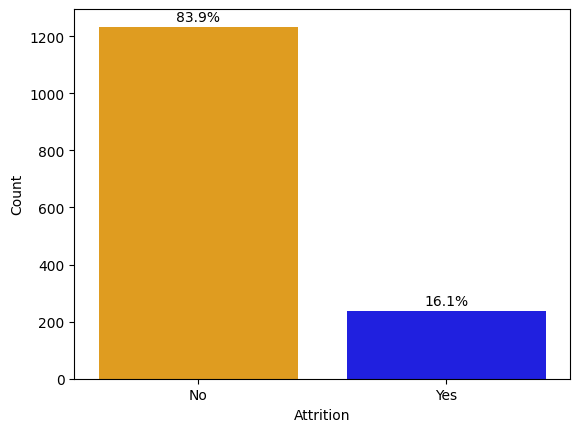

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of occurrences of each value of 'Attrition'
attrition_counts = df['Attrition'].value_counts()

# Calculate the percentage of each value of 'Attrition'
attrition_percentages = attrition_counts / attrition_counts.sum() * 100

# Define color palette for the two values of 'Attrition'
colors = {'Yes': 'Blue', 'No': 'Orange'}

# Create a barplot with count on y-axis and Attrition on x-axis
sns.barplot(data=attrition_counts.reset_index(),
            x='index',
            y='Attrition',
            palette=colors,
            orient='v')

# Add percentage labels to the bars
for i, v in enumerate(attrition_counts):
    plt.text(i, v+20, f'{attrition_percentages[i]:.1f}%', ha='center')

# Set the y-axis label
plt.ylabel('Count')
plt.xlabel('Attrition')

# Show the plot
plt.show()


<ipython-input-23-f30da3dc52a8>:18: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_mat = df.corr()


                              Age  DistanceFromHome  JobLevel  MonthlyIncome  \
Age                      1.000000         -0.001686  0.509604       0.497855   
DistanceFromHome        -0.001686          1.000000  0.005303      -0.017014   
JobLevel                 0.509604          0.005303  1.000000       0.950300   
MonthlyIncome            0.497855         -0.017014  0.950300       1.000000   
PercentSalaryHike        0.003634          0.040235 -0.034730      -0.027269   
TotalWorkingYears        0.680381          0.004628  0.782208       0.772893   
YearsAtCompany           0.311309          0.009508  0.534739       0.514285   
YearsInCurrentRole       0.212901          0.018845  0.389447       0.363818   
YearsSinceLastPromotion  0.216513          0.010029  0.353885       0.344978   
YearsWithCurrManager     0.202089          0.014406  0.375281       0.344079   

                         PercentSalaryHike  TotalWorkingYears  YearsAtCompany  \
Age                               0.00

<Figure size 640x480 with 0 Axes>

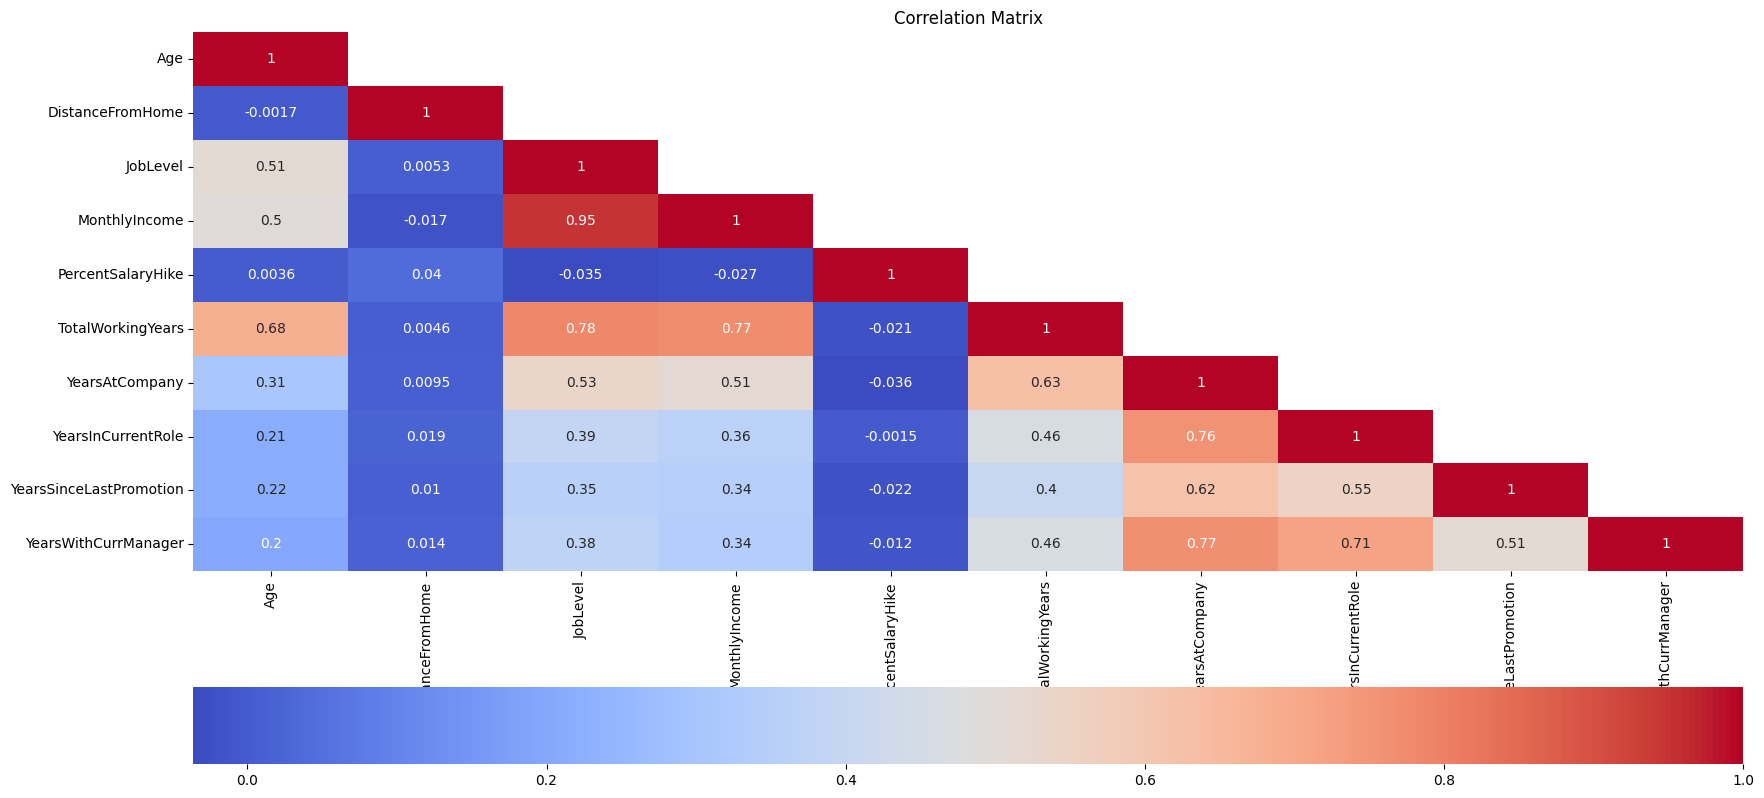

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import tracemalloc


# Initialize tracemalloc
tracemalloc.start()

# Start timer
start_time = time.time()




# Calculate correlation matrix
cor_mat = df.corr()
print(cor_mat)
# Create a mask to hide the lower triangle of the heatmap
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig, ax = plt.subplots(figsize=(20, 10))
# Create heatmap using Seaborn
sns.heatmap(data=cor_mat, mask=mask, annot=True, cmap='coolwarm', cbar_kws={'orientation': 'horizontal'})

# Set plot title
ax.set_title('Correlation Matrix')



for col in cor_mat.columns:
    for index, value in cor_mat[col].items():
        if (index != col) and (value > 0.7):
            print(f"{col} and {index}: {value}")





# End timer
end_time = time.time()

# Calculate elapsed time
elapsed_time = end_time - start_time

# Print elapsed time
print("Elapsed time: %.2f seconds" % elapsed_time)

# Print memory usage
current, peak = tracemalloc.get_traced_memory()
print(f"Current memory usage: {current / 10**6}MB")
print(f"Peak memory usage: {peak / 10**6}MB")

# Stop tracing memory
tracemalloc.stop()



<ipython-input-11-a124c375e809>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], kde=False, hist=True)


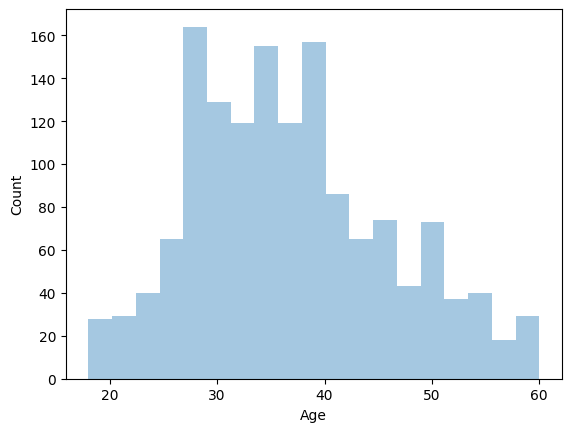

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#sns.distplot(df['Age'])
sns.distplot(df['Age'], kde=False, hist=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

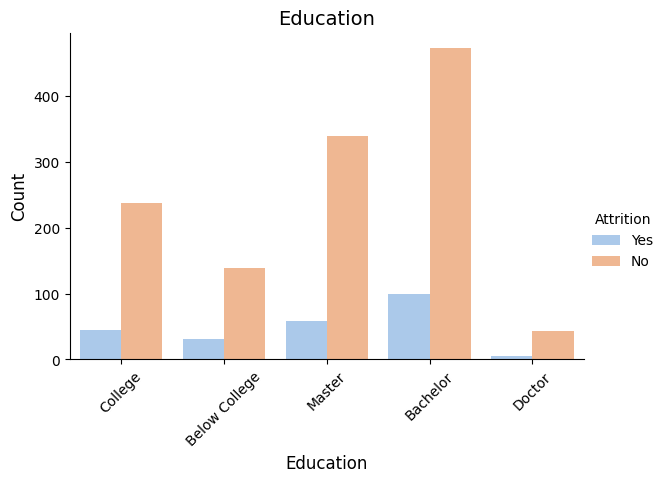

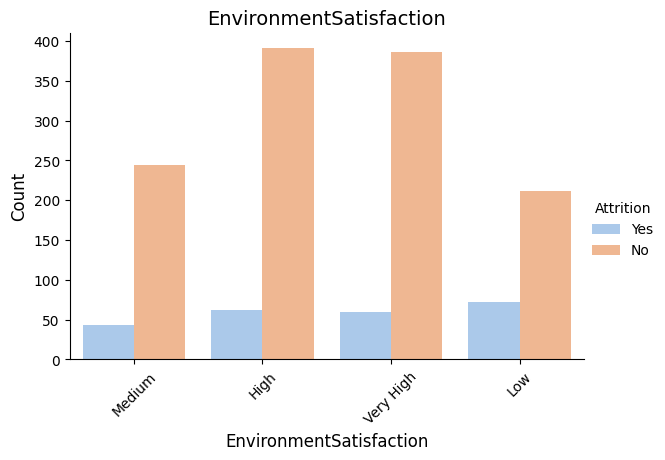

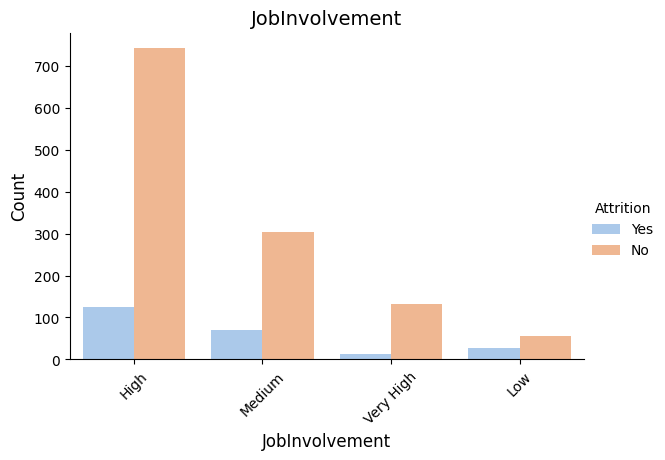

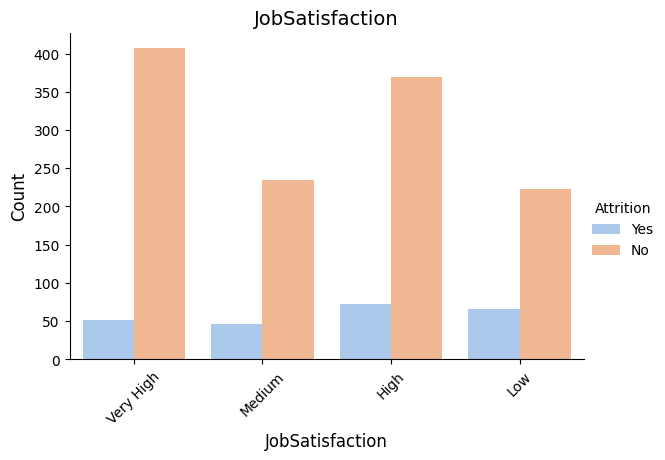

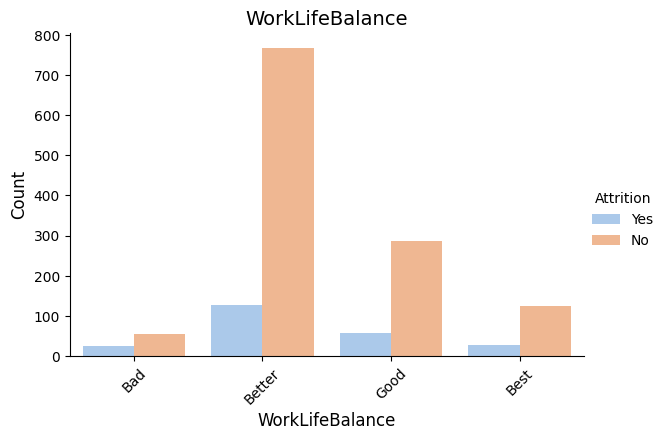

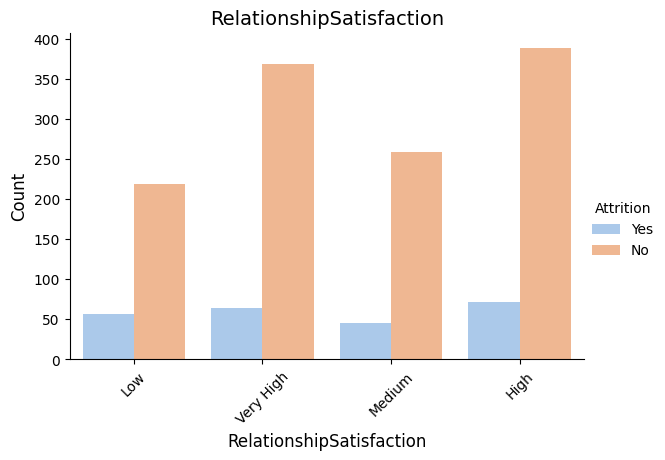

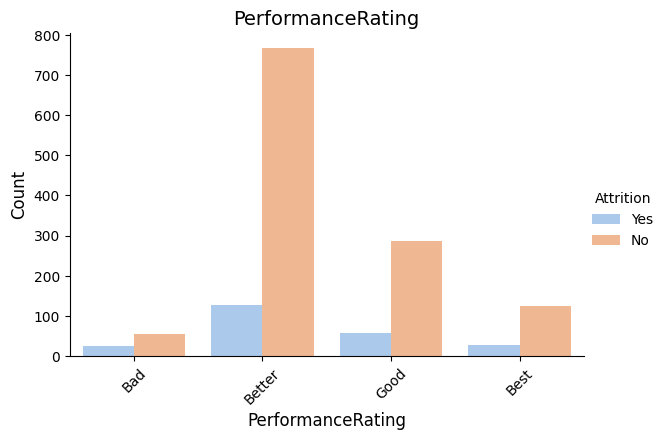

In [ ]:
col_disc=['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','WorkLifeBalance','RelationshipSatisfaction','PerformanceRating']

for col in col_disc:
    sns.catplot(x=col, hue='Attrition', kind="count", data=df, palette='pastel', height=4, aspect=1.5)
    plt.title(col, fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)
    plt.show()


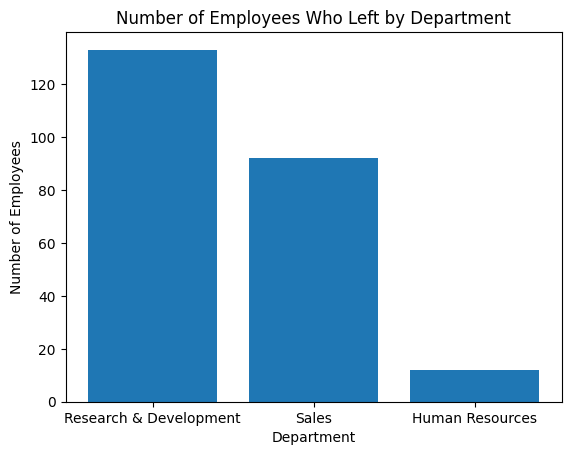

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# filter data to only include employees who answered "Yes" to Attrition
att_df = df[df['Attrition'] == 'Yes']

# count the number of employees who left (attrition) in each department
department_counts = att_df['Department'].value_counts()

# create bar chart
plt.bar(department_counts.index, department_counts.values)

# add chart title and axis labels
plt.title('Number of Employees Who Left by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')

# show the chart
plt.show()


In [ ]:
pd.crosstab(columns=[df.Attrition],index=[df.Department],margins=True,normalize='index') # set normalize=index to view rowwise %.

Attrition,No,Yes
Department,,
Human Resources,0.809524,0.190476
Research & Development,0.861602,0.138398
Sales,0.793722,0.206278
All,0.838776,0.161224


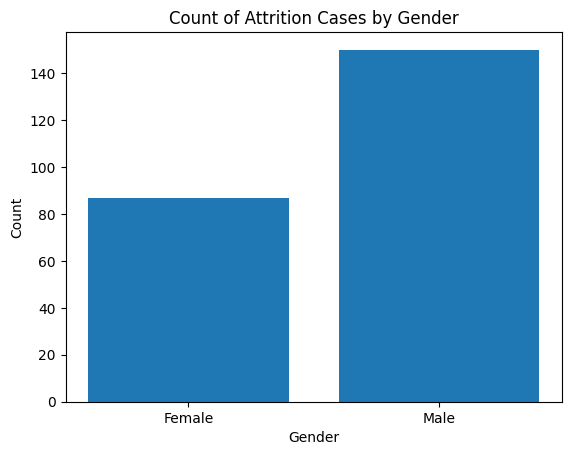

In [ ]:
import matplotlib.pyplot as plt

# Select only the rows where Attrition is "Yes"
attrition_df = df[df['Attrition'] == 'Yes']

# Group by Gender and count the number of rows
gender_counts = attrition_df.groupby('Gender').size()

# Plot the bar chart
plt.bar(gender_counts.index, gender_counts.values)
plt.title('Count of Attrition Cases by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


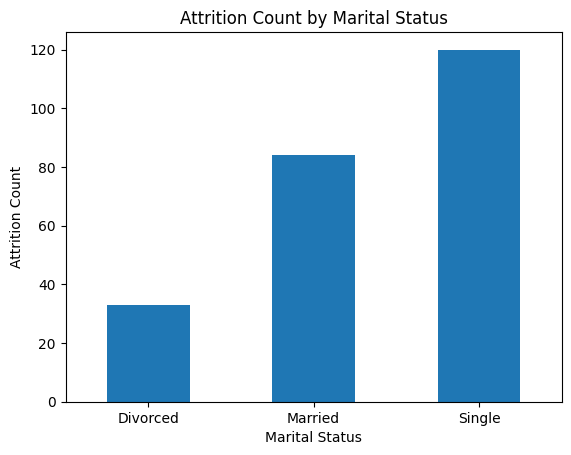

In [ ]:
import matplotlib.pyplot as plt

maritalstatus_attrition = df[df["Attrition"] == "Yes"].groupby("MaritalStatus")["Attrition"].count()
maritalstatus_attrition.plot(kind='bar', rot=0)

plt.title("Attrition Count by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Attrition Count")

plt.show()


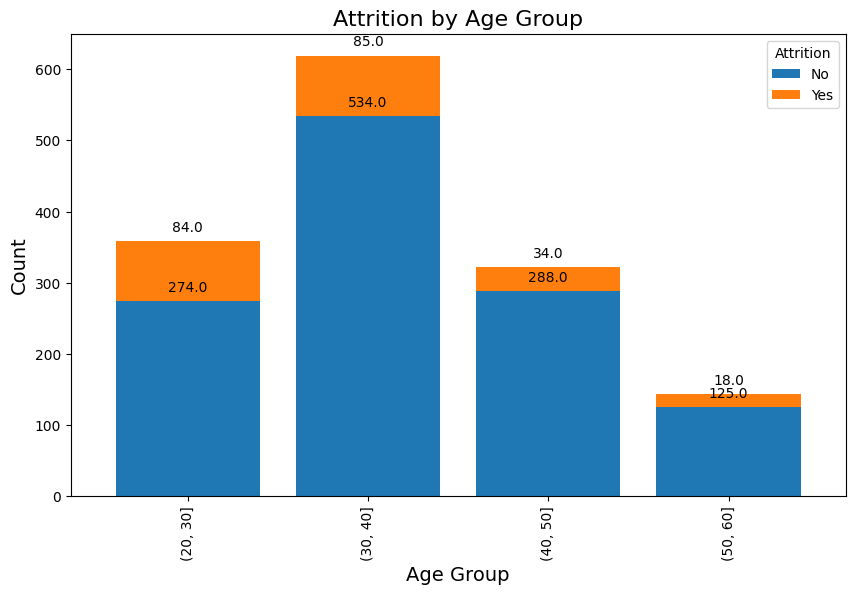

In [ ]:
# create age bins
bins = [20, 30, 40, 50, 60]

# group by age bin and attrition
age_groups = pd.cut(df['Age'], bins=bins)
df_grouped = df.groupby([age_groups, 'Attrition'])['Attrition'].count().unstack()

# plot the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
df_grouped.plot(kind='bar', stacked=True, ax=ax, width=0.8)

# add count labels on top of each bar
for p in ax.containers:
    ax.bar_label(p, label_type='edge', labels=p.datavalues, padding=5)

# set the title and labels
ax.set_title('Attrition by Age Group', fontsize=16)
ax.set_xlabel('Age Group', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# show the plot
plt.show()


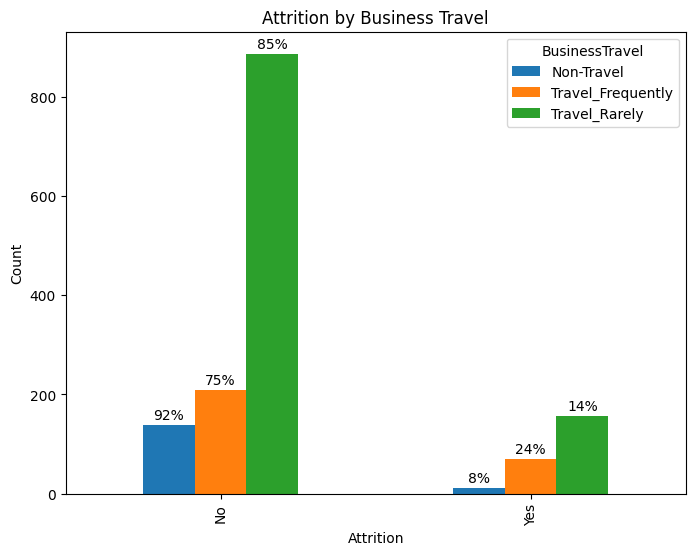

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


grouped_df = df.groupby(['BusinessTravel', 'Attrition']).size().reset_index(name='count')

# pivot the table to have BusinessTravel as columns and Attrition as index
pivoted_df = grouped_df.pivot(index='Attrition', columns='BusinessTravel', values='count')

# create the stacked bar chart
ax = pivoted_df.plot(kind='bar', stacked=False, figsize=(8, 6))

# add percentage labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', labels=[f"{int(val/sum(container.datavalues)*100)}%" if val!=0 else "" for val in container.datavalues], padding=2)

# set the title and labels
ax.set_title('Attrition by Business Travel')
ax.set_xlabel('Attrition')
ax.set_ylabel('Count')

# show the plot
plt.show()


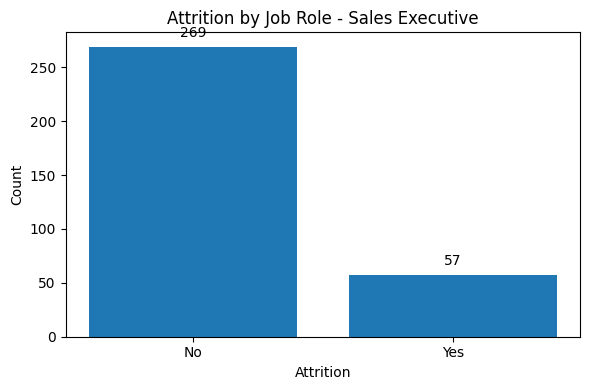

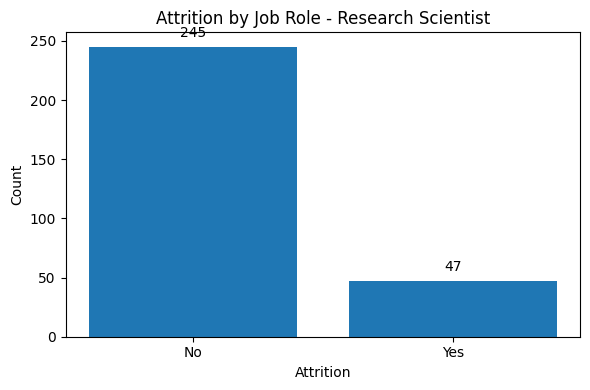

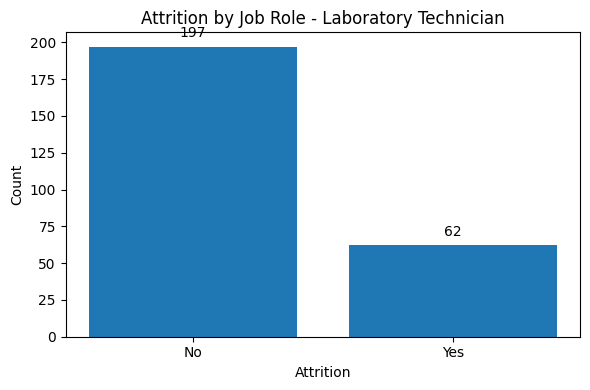

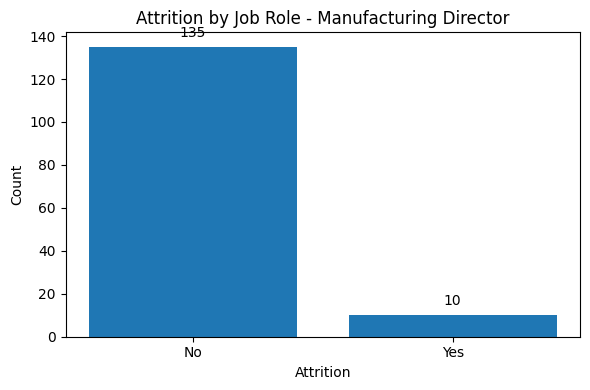

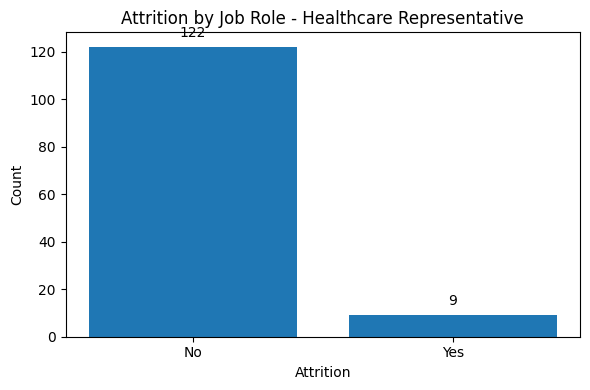

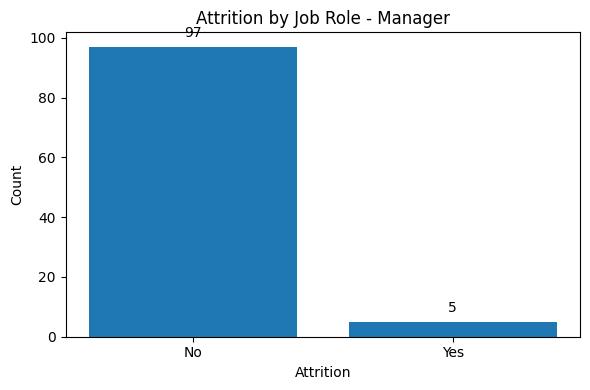

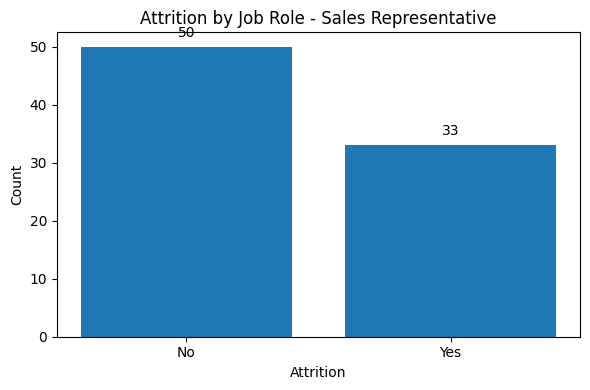

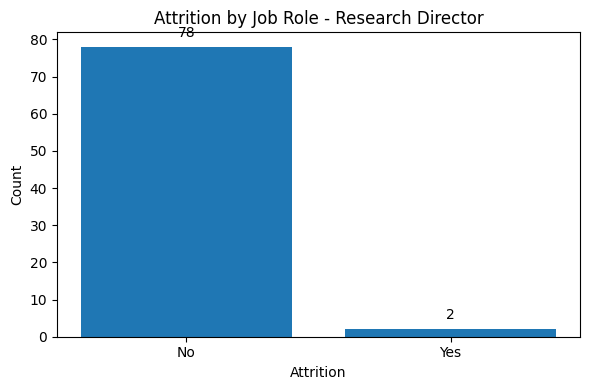

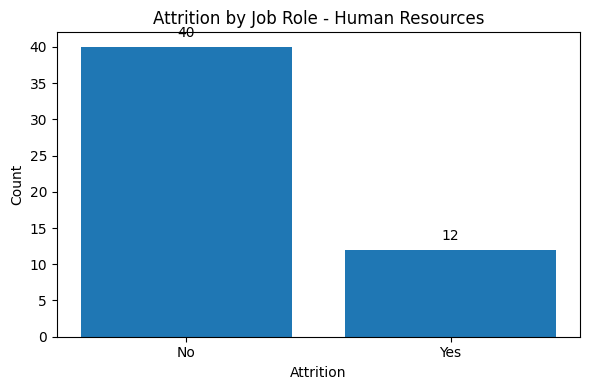

Elapsed time: 6.81 seconds
Current memory usage: 2.838441MB
Peak memory usage: 3.716805MB


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import tracemalloc

# Initialize tracemalloc
tracemalloc.start()

# Start timer
start_time = time.time()

# create a list of unique job roles
job_roles = df['JobRole'].unique()

# loop through each job role and create a bar chart
for role in job_roles:
    # filter the dataframe for the current job role
    role_df = df[df['JobRole'] == role]

    # group the filtered dataframe by Attrition and count the number of observations in each group
    grouped_df = role_df.groupby('Attrition').size().reset_index(name='Count')

    # create the bar chart
    fig, ax = plt.subplots(figsize=(6,4))
    ax.bar(grouped_df['Attrition'], grouped_df['Count'])

    # add count labels on top of each bar
    for p in ax.containers:
        ax.bar_label(p, label_type='edge', labels=p.datavalues, padding=5)

    # set the title and labels
    ax.set_title(f'Attrition by Job Role - {role}', fontsize=12)
    ax.set_xlabel('Attrition', fontsize=10)
    ax.set_ylabel('Count', fontsize=10)

    # adjust spacing between the bars and show the plot
    plt.tight_layout()
    plt.show()




# End timer
end_time = time.time()

# Calculate elapsed time
elapsed_time = end_time - start_time

# Print elapsed time
print("Elapsed time: %.2f seconds" % elapsed_time)

# Print memory usage
current, peak = tracemalloc.get_traced_memory()
print(f"Current memory usage: {current / 10**6}MB")
print(f"Peak memory usage: {peak / 10**6}MB")

# Stop tracing memory
tracemalloc.stop()


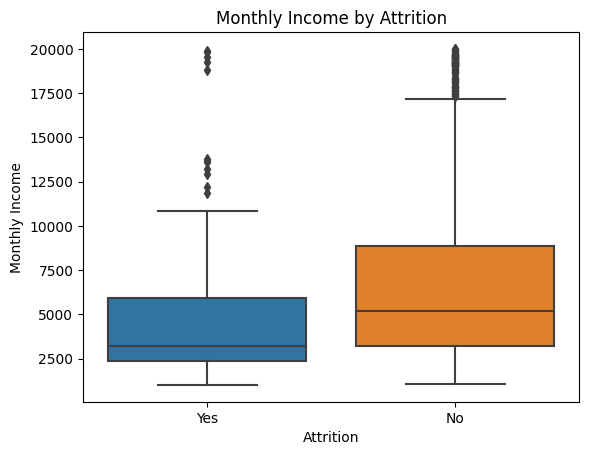

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='Attrition', y='MonthlyIncome')
plt.title('Monthly Income by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plt.show()


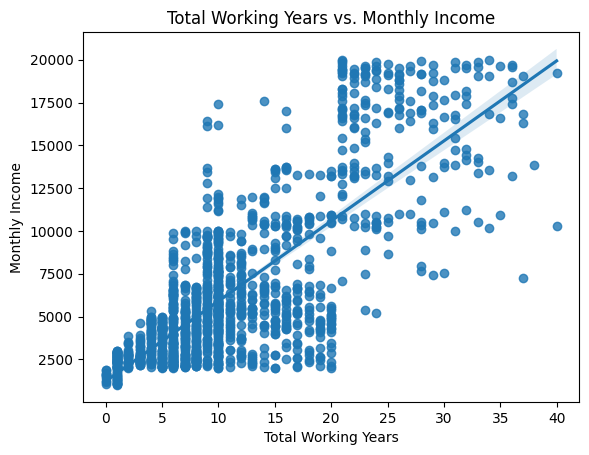

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(data=df, x='TotalWorkingYears', y='MonthlyIncome')

plt.title('Total Working Years vs. Monthly Income')
plt.xlabel('Total Working Years')
plt.ylabel('Monthly Income')

plt.show()


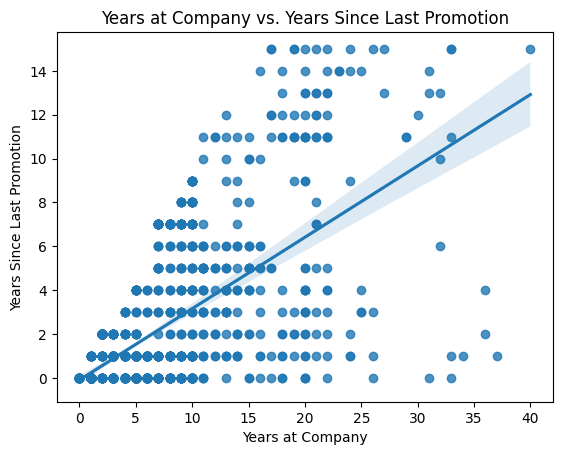

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.regplot(data=df, x='YearsAtCompany', y='YearsSinceLastPromotion')
plt.title('Years at Company vs. Years Since Last Promotion')
plt.xlabel('Years at Company')
plt.ylabel('Years Since Last Promotion')

plt.show()

In [ ]:
import pandas as pd

# create a pivot table with "Department" and "JobLevel" as rows, "Salary" as values, and the aggregation function set to "mean"
pivot_table = pd.pivot_table(df, values='MonthlyIncome', index=['Department', 'JobLevel'], aggfunc='mean')

# display the pivot table
print(pivot_table)


                                 MonthlyIncome
Department             JobLevel               
Human Resources        1           2733.212121
                       2           5563.461538
                       3           9623.000000
                       4          16147.500000
                       5          19197.857143
Research & Development 1           2840.064516
                       2           5291.238434
                       3          10170.488372
                       4          15634.676471
                       5          19218.510204
Sales                  1           2506.723684
                       2           5746.054167
                       3           9282.289157
                       4          15166.264706
                       5          19088.000000


In [ ]:
import pandas as pd

# create the pivot table
pivot_df = pd.pivot_table(df, index=['Department', 'EducationField'], values='MonthlyIncome', aggfunc='mean')

# print the pivot table
print(pivot_df)


                                         MonthlyIncome
Department             EducationField                 
Human Resources        Human Resources     7241.148148
                       Life Sciences       6914.062500
                       Medical             6594.076923
                       Other               5016.666667
                       Technical Degree    3081.250000
Research & Development Life Sciences       6179.984091
                       Medical             6539.223140
                       Other               6278.687500
                       Technical Degree    5760.819149
Sales                  Life Sciences       7246.233333
                       Marketing           7348.584906
                       Medical             6377.227273
                       Other               5398.733333
                       Technical Degree    6066.294118


In [ ]:
pd.crosstab(index=[df['Gender'], df['Department']], columns=df['Attrition'] == 'Yes')


Attrition                      False  True 
Gender Department                          
Female Human Resources            14      6
       Research & Development    336     43
       Sales                     151     38
Male   Human Resources            37      6
       Research & Development    492     90
       Sales                     203     54

In [ ]:
pd.crosstab(columns=[df.Attrition],index=[df.Gender],margins=True,normalize='index') # set normalize=index to view rowwise %.

Attrition,No,Yes
Gender,,
Female,0.852041,0.147959
Male,0.829932,0.170068
All,0.838776,0.161224


In [ ]:
X = df[['Age', 'JobLevel', 'MonthlyIncome']]
print(X)

      Age  JobLevel  MonthlyIncome
0      41         2           5993
1      49         2           5130
2      37         1           2090
3      33         1           2909
4      27         1           3468
...   ...       ...            ...
1465   36         2           2571
1466   39         3           9991
1467   27         2           6142
1468   49         2           5390
1469   34         2           4404

[1470 rows x 3 columns]


In [ ]:
pd.crosstab(columns=[df.Attrition],index=[df.JobLevel],margins=True,normalize='index') # set normalize=index to view rowwise %.

Attrition,No,Yes
JobLevel,,
1,0.736648,0.263352
2,0.902622,0.097378
3,0.853211,0.146789
4,0.952830,0.047170
5,0.927536,0.072464
All,0.838776,0.161224


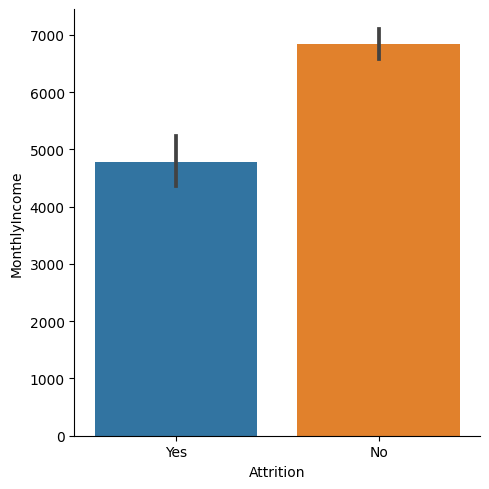

In [ ]:
import seaborn as sns
sns.catplot(data=df, kind='bar', x='Attrition', y='MonthlyIncome')


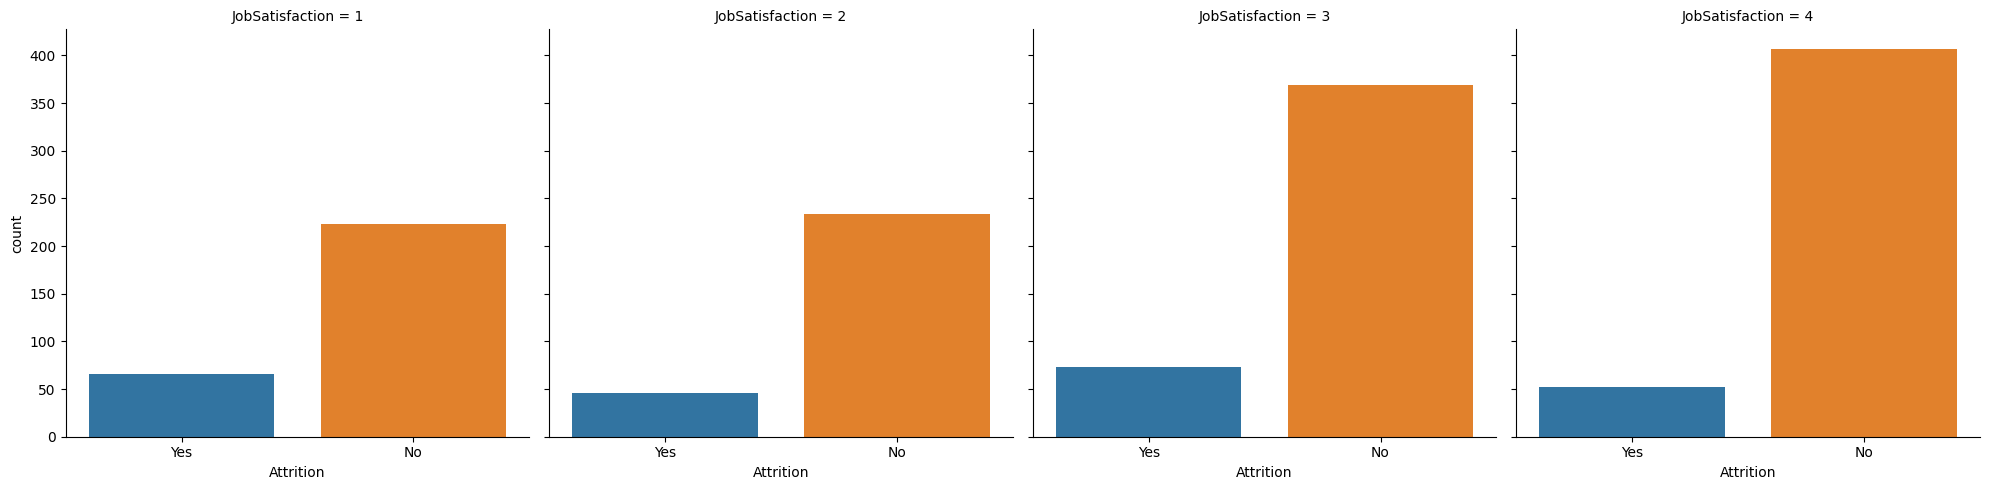

In [ ]:
sns.catplot(data=df,kind='count',x='Attrition',col='JobSatisfaction')

In [ ]:
pd.crosstab(columns=[df.Attrition],index=[df.JobSatisfaction],margins=True,normalize='index') # set normalize=index to view rowwise %.

Attrition,No,Yes
JobSatisfaction,,
1,0.771626,0.228374
2,0.835714,0.164286
3,0.834842,0.165158
4,0.886710,0.113290
All,0.838776,0.161224


In [ ]:
pd.crosstab(columns=[df.Attrition],index=[df.EnvironmentSatisfaction],margins=True,normalize='index') # set normalize=index to view rowwise %.


Attrition,No,Yes
EnvironmentSatisfaction,,
1,0.746479,0.253521
2,0.850174,0.149826
3,0.863135,0.136865
4,0.865471,0.134529
All,0.838776,0.161224


In [ ]:
pd.crosstab(columns=[df.Attrition],index=[df.JobInvolvement],margins=True,normalize='index') # set normalize=index to view rowwise %

Attrition,No,Yes
JobInvolvement,,
1,0.662651,0.337349
2,0.810667,0.189333
3,0.855991,0.144009
4,0.909722,0.090278
All,0.838776,0.161224


In [ ]:
pd.crosstab(columns=[df.Attrition],index=[df.WorkLifeBalance],margins=True,normalize='index') # set normalize=index to view rowwise %.

Attrition,No,Yes
WorkLifeBalance,,
1,0.687500,0.312500
2,0.831395,0.168605
3,0.857783,0.142217
4,0.823529,0.176471
All,0.838776,0.161224


In [ ]:
pd.crosstab(columns=[df.Attrition],index=[df.RelationshipSatisfaction],margins=True,normalize='index') # set normalize=index to view rowwise %.

Attrition,No,Yes
RelationshipSatisfaction,,
1,0.793478,0.206522
2,0.851485,0.148515
3,0.845316,0.154684
4,0.851852,0.148148
All,0.838776,0.161224


In [ ]:
from sklearn.preprocessing import LabelEncoder

def transform(feature):
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])
    print(le.classes_)

cat_df = df.select_dtypes(include='object')
for col in cat_df.columns:
    transform(col)


['No' 'Yes']
['Non-Travel' 'Travel_Frequently' 'Travel_Rarely']
['Human Resources' 'Research & Development' 'Sales']
['Bachelor' 'Below College' 'College' 'Doctor' 'Master']
['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree']
['High' 'Low' 'Medium' 'Very High']
['Female' 'Male']
['High' 'Low' 'Medium' 'Very High']
['Healthcare Representative' 'Human Resources' 'Laboratory Technician'
 'Manager' 'Manufacturing Director' 'Research Director'
 'Research Scientist' 'Sales Executive' 'Sales Representative']
['High' 'Low' 'Medium' 'Very High']
['Divorced' 'Married' 'Single']
['No' 'Yes']
['Bad' 'Best' 'Better' 'Good']
['High' 'Low' 'Medium' 'Very High']
['Bad' 'Best' 'Better' 'Good']


In [ ]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,2,1,2,1,2,0,0,...,1,11,0,1,8,0,6,4,0,5
1,49,0,1,1,8,1,1,0,1,2,...,0,23,2,3,10,2,10,7,1,7
2,37,1,2,1,2,2,4,3,1,2,...,1,15,2,2,7,2,0,0,0,0
3,33,0,1,1,3,4,1,3,0,0,...,1,11,2,0,8,2,8,7,3,0
4,27,0,2,1,2,1,3,1,1,0,...,0,12,2,3,6,2,2,2,2,2


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled_df=scaler.fit_transform(df.drop('Attrition',axis=1))
X=scaled_df
Y = df['Attrition'].to_numpy()



In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split



X = df.drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train logistic regression model
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Train decision tree model
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# Train random forest model
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Train gradient boosting model
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

# Evaluate the performance of the models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

models = [log_reg, dtc, rfc, gbc]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_mat = confusion_matrix(y_test, y_pred)

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print(f"Confusion Matrix:\n{conf_mat}\n")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.8571428571428571
Precision: 0.4166666666666667
Recall: 0.08196721311475409
F1-score: 0.136986301369863
Confusion Matrix:
[[373   7]
 [ 56   5]]

Model: Decision Tree
Accuracy: 0.7913832199546486
Precision: 0.26153846153846155
Recall: 0.2786885245901639
F1-score: 0.2698412698412698
Confusion Matrix:
[[332  48]
 [ 44  17]]

Model: Random Forest
Accuracy: 0.8662131519274376
Precision: 0.6
Recall: 0.09836065573770492
F1-score: 0.16901408450704225
Confusion Matrix:
[[376   4]
 [ 55   6]]

Model: Gradient Boosting
Accuracy: 0.8752834467120182
Precision: 0.6
Recall: 0.29508196721311475
F1-score: 0.3956043956043956
Confusion Matrix:
[[368  12]
 [ 43  18]]



In [ ]:
new_X = df.drop('Attrition', axis=1)
new_y = df['Attrition']

# Predict using logistic regression model
log_reg_y_pred = log_reg.predict(new_X)
print("Logistic Regression Predictions:")
print(log_reg_y_pred)

# Predict using decision tree model
dtc_y_pred = dtc.predict(new_X)
print("Decision Tree Predictions:")
print(dtc_y_pred)

# Predict using random forest model
rfc_y_pred = rfc.predict(new_X)
print("Random Forest Predictions:")
print(rfc_y_pred)

# Predict using gradient boosting model
gbc_y_pred = gbc.predict(new_X)
print("Gradient Boosting Predictions:")
print(gbc_y_pred)

for model, name in zip(models, model_names):
    # code for evaluating the performance of the models
    print("Evaluation completed.")


Logistic Regression Predictions:
[0 0 0 ... 0 0 0]
Decision Tree Predictions:
[1 0 1 ... 0 0 0]
Random Forest Predictions:
[1 0 1 ... 0 0 0]
Gradient Boosting Predictions:
[0 0 1 ... 0 0 0]
Evaluation completed.
Evaluation completed.
Evaluation completed.
Evaluation completed.


In [ ]:
from sklearn.metrics import accuracy_score

log_reg_acc = accuracy_score(new_y, log_reg_y_pred)
dtc_acc = accuracy_score(new_y, dtc_y_pred)
rfc_acc = accuracy_score(new_y, rfc_y_pred)
gbc_acc = accuracy_score(new_y, gbc_y_pred)

print("Logistic Regression Accuracy:", log_reg_acc)
print("Decision Tree Accuracy:", dtc_acc)
print("Random Forest Accuracy:", rfc_acc)
print("Gradient Boosting Accuracy:", gbc_acc)


Logistic Regression Accuracy: 0.8469387755102041
Decision Tree Accuracy: 0.9374149659863945
Random Forest Accuracy: 0.9598639455782313
Gradient Boosting Accuracy: 0.9224489795918367
